In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix 

In [2]:
df_app = pd.read_csv('application_record.csv')
df_app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
df_credit = pd.read_csv('credit_record.csv')
df_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
df_app.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [5]:
df_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1048575.0,5.068286e+06,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
MONTHS_BALANCE,1048575.0,-1.913700e+01,14.023498,-60.0,-29.0,-17.0,-7.0,0.0


In [6]:
df_app.skew()

ID                  0.212718
CNT_CHILDREN        1.806941
AMT_INCOME_TOTAL    8.834066
DAYS_BIRTH         -0.160181
DAYS_EMPLOYED       1.739495
FLAG_MOBIL          0.000000
FLAG_WORK_PHONE     1.452898
FLAG_PHONE          0.937568
FLAG_EMAIL          2.522482
CNT_FAM_MEMBERS     0.919676
dtype: float64

In [7]:
df_credit.skew()

ID                0.163081
MONTHS_BALANCE   -0.620084
dtype: float64

## Count Plot of Categorical Features: application_details

In [8]:
def countplot(features, hue, data):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=data[feature], hue=hue , data=data)
        plt.legend(loc='best')
        total = len(data[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

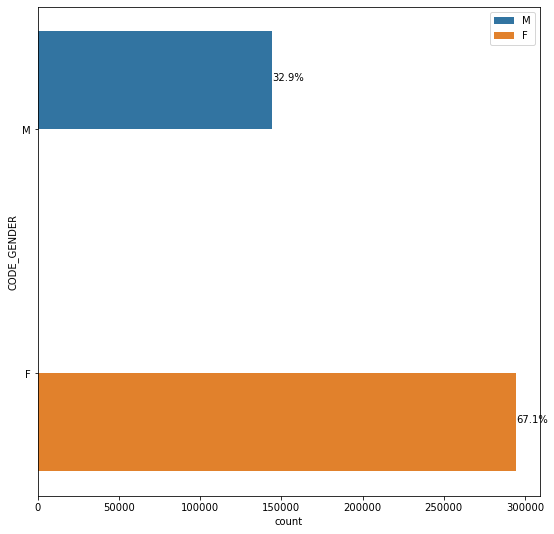

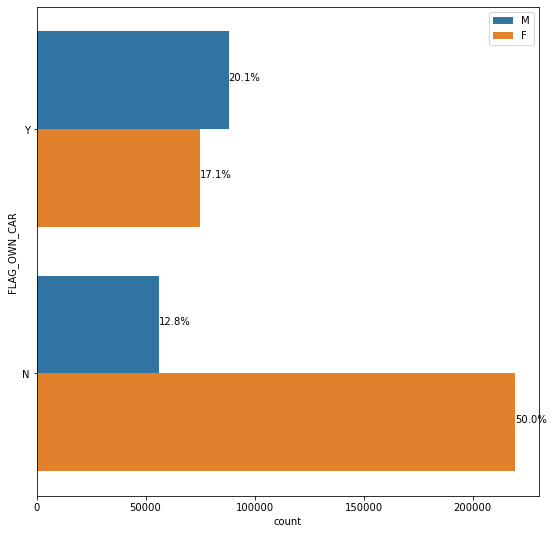

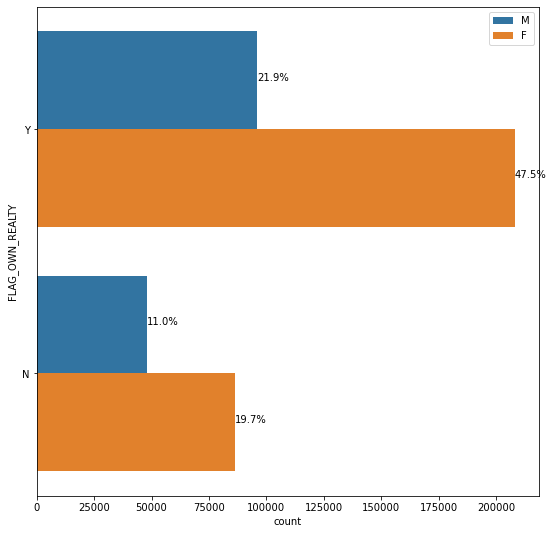

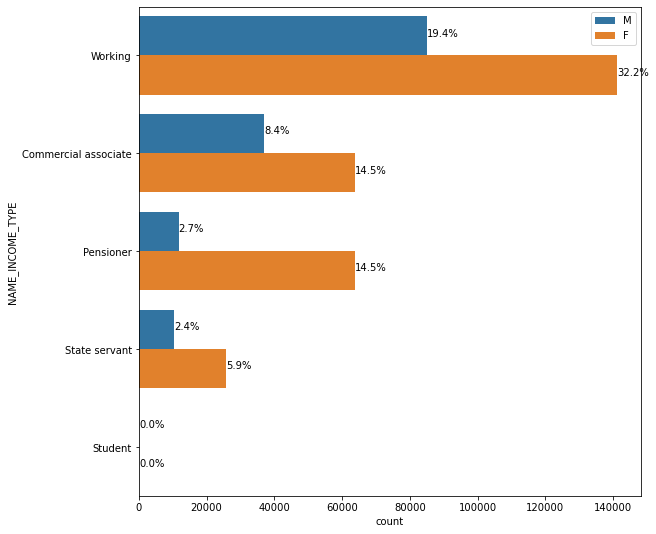

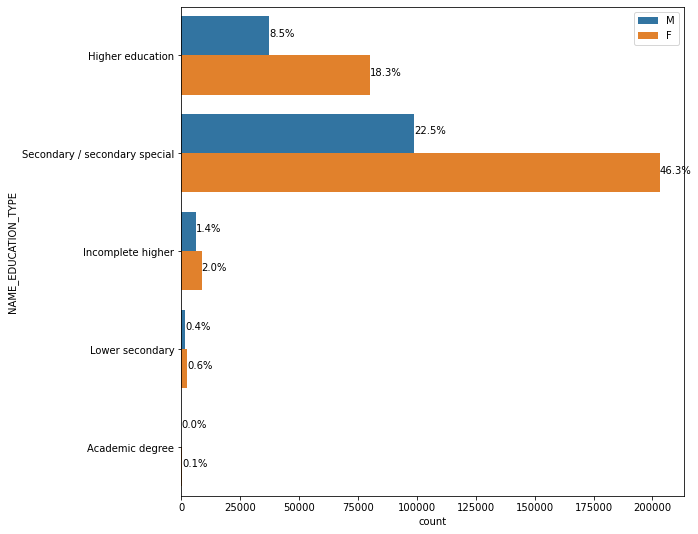

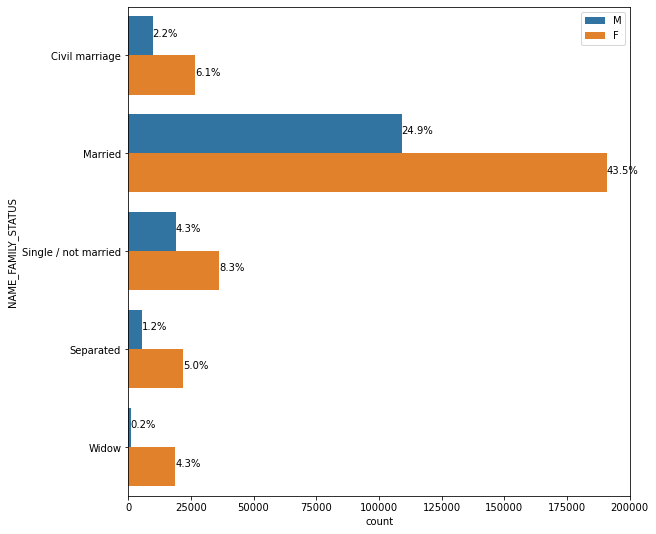

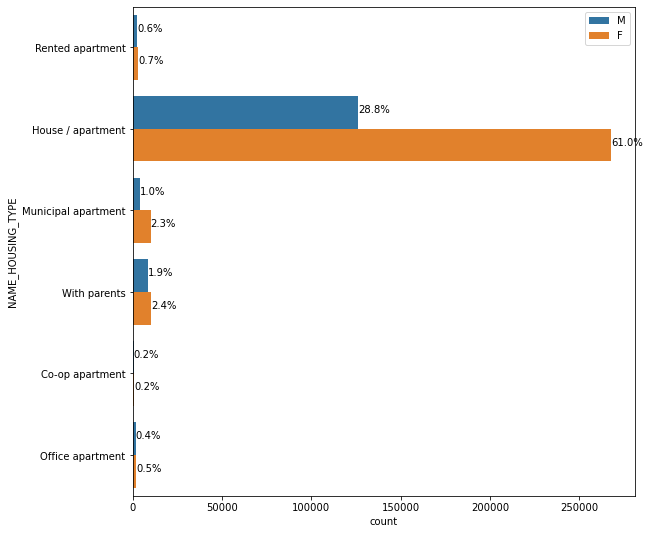

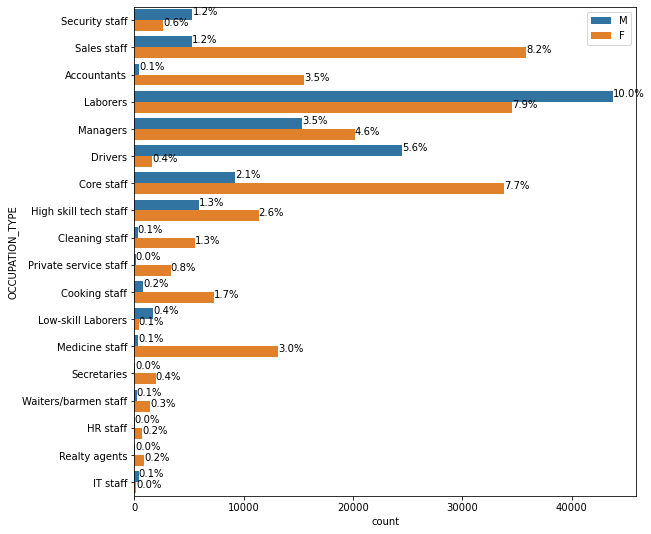

In [9]:
countplot(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'], 'CODE_GENDER', df_app)

## Insights from the CountPlot Analysis: applictaion_details
1. 36.9% applications are from male and 67.1% applications are from female.
2. 20.1% of male applicants and 17.1% of female applicants have car.
3. 12.8% of male applicants and 50% of female applicants does'nt have car.
4. 21.9% of male applicants and 47.5% of female applicants have property.
5. 11% of male applicants and 19.7% of female applicants does'nt have propert.
6. 19.4% of male applicants and 32.2% of female applicants are working.
7. 8.4% of male applicants and 14.5% of female applicants are commercial assciates.
8. 2.7% of male applicants and 14.5% of female applicants are pensioner.
9. 2.4% of male applicants and 5.9% of female applicants are state servents.
10. 8.5% of male applicants and 18.3% of female applicants have completed their higher education.
11. 22.5% of male applicants and 46.3% of female applicants have completed their secondary education.
12. 1.4% of male applicants and 2% of female applicants did'nt completed their higher education.
13. 0.4% of male applicants and 0.6% of female applicants did'nt completed their secondary education.
14. 0% of male applicants and 0.1% of female applicants have academic degree.
15. 2.2% of male applicants and 6.1% of female applicants have done civil marriage.
16. 24.9% of male applicants and 43.5% of female applicants are married.
17. 4.3% of male applicants and 8.3% of female applicants are single.
18. 1.2% of male applicants and 5% of female applicants are seperated.
19. 0.2% of male applicants and 4.3% of female applicants widow.
20. 0.6% of male applicants and 0.7% of female applicants live in a rented apartment.
21. 28.8% of male applicants and 61.0% of female applicants live in a apartment.
22. 0.6% of male applicants and 0.7% of female applicants live in a rented apartment.
23. 1% of male applicants and 2.3% of female applicants live in municipal apartment.
24. 1.9% of male applicants and 2.4% of female applicants live with their parents.
25. 0.4% of male applicants and 0.5% of female applicants live in office apartment.
26. Occupation details:
    security staff: male-1.2% and female-0.6%
    sales staff: male-1.2% and female-8.2%
    accountant: male-0.1% and female-3.5%
    labours: male-10% and female-7.9%
    managers: male-3.5% and female-4.6%
    drivers: male-5.6% and female-0.4%
    core staff: male-2.1% and female-7.7%
    high skill tech staff: male-1.3% and female-2.6%
    cleaning staff: male-0.1% and female-1.3%
    private service staff: male-0% and female-0.8%
    cooking staff: male-0.2% and female-1.7%
    low-skill labourers: male-0.4% and female-0.1%
    medicine staff: male-0.1% and female-3%
    secrentances: male-0% and female-0.4%
    waiters/barmen staff: male-0.1% and female-0.3%
    hr staff: male-0% and female-0.2%
    realty agent: male-0% and female-0.2%
    it staff: male-0.1% and female-0%

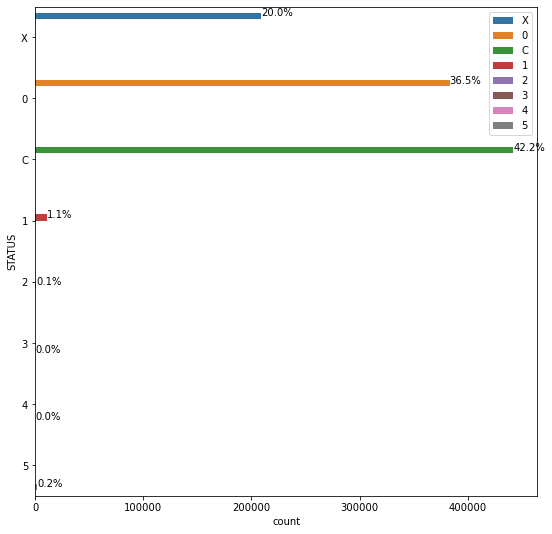

In [10]:
countplot(['STATUS'], 'STATUS', df_credit)

## Insights from the CountPlot Analysis: credit_record
C: loan for that month is already paid X: no loan for that month 0: loan is 1 to 29 days overdue 1: loan is 30 to 59 days overdue 2: loan is 60 to 89 days overdue 3:loan is 90 to 119 days overdue 4: loan is 120 to 149 days overdue 5: loan is more than 150 days overdue

a. 20% of applicatnts does'nt have loan of the current month. b. 36.5% of applicants have overdue for 1-29 days. c. 42.2% of applicants already paid current month loan. d. 1.1% of applicants have overdue for 30-59 days. e. 0.1% of applicants have overdue for 60-89 days. f. 0% of applicants have overdue for 90-119 days. g. 0% of applicants have overdue for 120-149 days. h. 0.2% of applicants have overdue for 150 days.

# Feature Engineering

In [11]:
# Coverting age i.e. in days format to years
df_app['AGE'] = np.ceil(pd.to_timedelta(df_app['DAYS_BIRTH'], unit='D').dt.days / -365)

In [12]:
df_app['AGE']

0         33.0
1         33.0
2         59.0
3         53.0
4         53.0
          ... 
438552    63.0
438553    44.0
438554    23.0
438555    60.0
438556    52.0
Name: AGE, Length: 438557, dtype: float64

In [13]:
df_app.drop('DAYS_BIRTH', axis=1, inplace=True)

In [14]:
df_app.loc[(df_app['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0
df_app['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(df_app['DAYS_EMPLOYED'], unit='D').dt.days / -365)
df_app['YEARS_EMPLOYED']

0         13.0
1         13.0
2          4.0
3          9.0
4          9.0
          ... 
438552    -0.0
438553     9.0
438554     2.0
438555    -0.0
438556     4.0
Name: YEARS_EMPLOYED, Length: 438557, dtype: float64

In [15]:
df_app.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)

## Encoding Categorical Features to Numerical Values

In [16]:
def Cat_to_Num(features, data):
    for feature in features:
        feature_list = list(np.unique(data[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        data.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [17]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE']
Cat_to_Num(categorical_features, df_app)

CODE_GENDER --> {'F': 0, 'M': 1}
FLAG_OWN_CAR --> {'N': 0, 'Y': 1}
FLAG_OWN_REALTY --> {'N': 0, 'Y': 1}
NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}


In [18]:
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
df_credit.replace({'STATUS' : convert_to}, inplace=True)

In [19]:
df_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


In [20]:
credit_record = df_credit.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0
...,...,...,...
5150482,0,18,0
5150483,0,18,0
5150484,0,13,0


In [21]:
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0

In [22]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1.0
5001712,0,19,0,1.0
5001713,0,22,0,1.0
5001714,0,15,0,1.0
5001715,0,60,0,1.0
...,...,...,...,...
5150482,0,18,0,1.0
5150483,0,18,0,1.0
5150484,0,13,0,1.0


In [23]:
np.unique(credit_record['CREDIT_APPROVAL_STATUS'])

array([0., 1.])

In [24]:
credit_record['CREDIT_APPROVAL_STATUS'] = credit_record['CREDIT_APPROVAL_STATUS'].astype('int')
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1
5001712,0,19,0,1
5001713,0,22,0,1
5001714,0,15,0,1
5001715,0,60,0,1
...,...,...,...,...
5150482,0,18,0,1
5150483,0,18,0,1
5150484,0,13,0,1


In [25]:
credit_record.drop(['Bad_Debt', 'Good_Debt', 'Neutral_Debt'], axis=1, inplace=True)

In [26]:
df = df_app.merge(credit_record, how='inner', on=['ID'])

In [27]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_APPROVAL_STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,33.0,13.0,1
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,33.0,13.0,1
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,Security staff,2.0,59.0,4.0,1
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,Sales staff,1.0,53.0,9.0,1
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,Sales staff,1.0,53.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,4,4,1,1,1,0,0,0,Managers,2.0,48.0,7.0,0
36453,5149834,0,0,1,0,157500.0,0,1,1,1,1,0,1,1,Medicine staff,2.0,34.0,4.0,0
36454,5149838,0,0,1,0,157500.0,1,1,1,1,1,0,1,1,Medicine staff,2.0,34.0,4.0,1
36455,5150049,0,0,1,0,283500.0,4,4,1,1,1,0,0,0,Sales staff,2.0,50.0,2.0,1


In [28]:
df.drop('ID', axis=1, inplace=True)

In [29]:
X = df.drop('CREDIT_APPROVAL_STATUS', axis=1)
y = df['CREDIT_APPROVAL_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

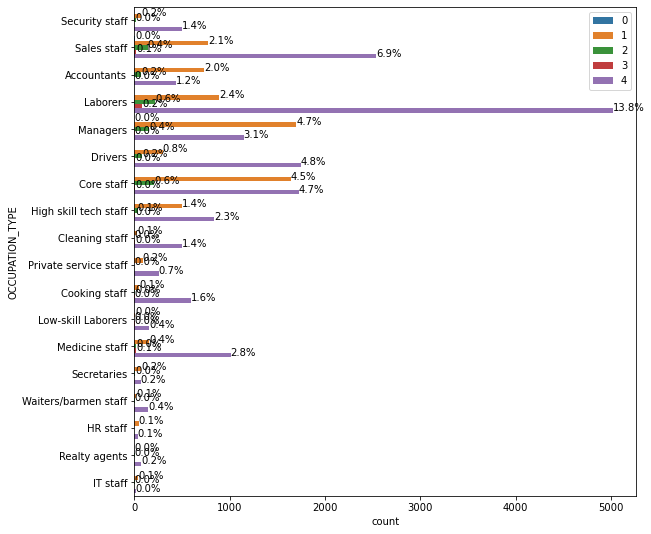

In [30]:
countplot(['OCCUPATION_TYPE'], 'NAME_EDUCATION_TYPE', df)

In [31]:
X_train['OCCUPATION_TYPE'].isnull().sum()

9027

In [32]:
X_train.shape

(29165, 17)

In [33]:
X_test['OCCUPATION_TYPE'].isnull().sum()

2296

In [34]:
X_test.shape

(7292, 17)

In [35]:
df_app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,33.0,13.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,33.0,13.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,Security staff,2.0,59.0,4.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,Sales staff,1.0,53.0,9.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,Sales staff,1.0,53.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,0,1,0,135000.0,1,4,2,1,1,0,0,0,NaN,1.0,63.0,-0.0
438553,6840222,0,0,0,0,103500.0,4,4,3,1,1,0,0,0,Laborers,1.0,44.0,9.0
438554,6841878,0,0,0,0,54000.0,0,1,3,5,1,1,0,0,Sales staff,1.0,23.0,2.0
438555,6842765,0,0,1,0,72000.0,1,4,1,1,1,0,0,0,NaN,2.0,60.0,-0.0


In [36]:
def occupation_by_education_by_gender(occupations, educations, genders, houses, length, data):
    Gender = []
    Education = []
    Occupation = []
    Percentage = []
    House = []
    for gender in genders:
        for education in educations:
            for occupation in occupations:
                for house in houses:
                    Gender.append(gender)
                    Education.append(education)
                    Occupation.append(occupation)
                    House.append(house)
                    temp_df_1=data.loc[data['OCCUPATION_TYPE'] == occupation]
                    temp_df_2=temp_df_1.loc[temp_df_1['CODE_GENDER'] == gender]
                    temp_df_3=temp_df_2.loc[temp_df_2['NAME_EDUCATION_TYPE'] == education]
                    temp_df_4=temp_df_3.loc[temp_df_3['NAME_HOUSING_TYPE'] == house]
                    length_filter = len(temp_df_4)
                    Percentage.append(length_filter/length)
    percent_dict={
        'Gender': Gender,
        'Education': Education,
        'Occupation': Occupation,
        'House': House,
        'Popularity Percentage': Percentage
    }
    df = pd.DataFrame(percent_dict)
    df.to_excel('Occupation_popularity_index.xlsx', index=False)

In [37]:
occupation_by_education_by_gender(list(X_train['OCCUPATION_TYPE'].unique()), list(X_train['NAME_EDUCATION_TYPE'].unique()), list(X_train['CODE_GENDER'].unique()), list(X_train['NAME_HOUSING_TYPE'].unique()), len(X_train), X_train)

In [38]:
occupation_popularity = pd.read_excel('Occupation_popularity_index.xlsx')

In [39]:
occupation_popularity

,Gender,Education,Occupation,House,Popularity Percentage
0,1,4,Core staff,5,0.001166
1,1,4,Core staff,1,0.007543
2,1,4,Core staff,2,0.000309
3,1,4,Core staff,4,0.000137
4,1,4,Core staff,3,0.000069
...,...,...,...,...,...
1135,0,0,Realty agents,1,0.000000
1136,0,0,Realty agents,2,0.000000
1137,0,0,Realty agents,4,0.000000
1138,0,0,Realty agents,3,0.000000


## Replacing blank 'OCCUPATION_TYPE' with most popular occupation

In [40]:
occupation_popularity['Tag'] = occupation_popularity['Gender'].astype('str') + '_' + occupation_popularity['Education'].astype('str') 
occupation_popularity

,Gender,Education,Occupation,House,Popularity Percentage,Tag
0,1,4,Core staff,5,0.001166,1_4
1,1,4,Core staff,1,0.007543,1_4
2,1,4,Core staff,2,0.000309,1_4
3,1,4,Core staff,4,0.000137,1_4
4,1,4,Core staff,3,0.000069,1_4
...,...,...,...,...,...,...
1135,0,0,Realty agents,1,0.000000,0_0
1136,0,0,Realty agents,2,0.000000,0_0
1137,0,0,Realty agents,4,0.000000,0_0
1138,0,0,Realty agents,3,0.000000,0_0


## Creating 'Tag' vs. popularity dictionary

In [41]:
def Dict(data):
    tag_list=list(data['Tag'].unique())
    popular_occupation = []
    data_grouped = data.groupby('Tag')
    for tag in tag_list:
        grouped_data = data_grouped.get_group(tag)
        popular_occupation.append(grouped_data.loc[grouped_data['Popularity Percentage'] == max(list(grouped_data['Popularity Percentage']))]['Occupation'].tolist()[0])
    Tag_dict={
        'Tag': tag_list,
        'Occupation': popular_occupation
    }
    return Tag_dict

In [42]:
dict_df = Dict(occupation_popularity)

In [43]:
pd.DataFrame(dict_df).to_excel('Tag_vs_Occupation.xlsx', index=False)

In [44]:
tag_data = pd.read_excel('Tag_vs_Occupation.xlsx')
tag_data

,Tag,Occupation
0,1_4,Laborers
1,1_1,Managers
2,1_3,Laborers
3,1_2,Laborers
4,1_0,Managers
5,0_4,Sales staff
6,0_1,Core staff
7,0_3,Laborers
8,0_2,Core staff
9,0_0,Sales staff


In [45]:
tag_g = list(tag_data['Tag'])
occu_g = list(tag_data['Occupation'])
tag_dict = {}
for index in range(len(tag_g)):
    tag_dict[tag_g[index]] = occu_g[index]

In [46]:
tag_dict

{'1_4': 'Laborers',
 '1_1': 'Managers',
 '1_3': 'Laborers',
 '1_2': 'Laborers',
 '1_0': 'Managers',
 '0_4': 'Sales staff',
 '0_1': 'Core staff',
 '0_3': 'Laborers',
 '0_2': 'Core staff',
 '0_0': 'Sales staff'}

In [47]:
X_train['Tag'] = X_train['CODE_GENDER'].astype('str')+ '_' + X_train['NAME_EDUCATION_TYPE'].astype('str')

C:\Users\home\AppData\Local\Temp\ipykernel_3024\343595784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Tag'] = X_train['CODE_GENDER'].astype('str')+ '_' + X_train['NAME_EDUCATION_TYPE'].astype('str')


In [48]:
def Replace_nan_occupation(df):
    for key in tag_dict:
        if df['Tag'] == key and pd.isnull(df['OCCUPATION_TYPE']):
            df['OCCUPATION_TYPE'] = tag_dict[key]
    return df

In [49]:
X_train = X_train.apply(Replace_nan_occupation, axis=1)

In [50]:
X_train.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
AGE                    0
YEARS_EMPLOYED         0
Tag                    0
dtype: int64

In [51]:
X_train.drop(columns=['Tag'], axis=1, inplace = True)

In [52]:
Cat_to_Num(['OCCUPATION_TYPE'], X_train)

OCCUPATION_TYPE --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17}


In [53]:
occupation_by_education_by_gender(list(X_test['OCCUPATION_TYPE'].unique()), list(X_test['NAME_EDUCATION_TYPE'].unique()), list(X_test['CODE_GENDER'].unique()), list(X_test['NAME_HOUSING_TYPE'].unique()), len(X_test), X_test)

In [54]:
occupation_popularity = pd.read_excel('Occupation_popularity_index.xlsx')
occupation_popularity['Tag'] = occupation_popularity['Gender'].astype('str') + '_' + occupation_popularity['Education'].astype('str') 
occupation_popularity

,Gender,Education,Occupation,House,Popularity Percentage,Tag
0,0,4,Medicine staff,1,0.022628,0_4
1,0,4,Medicine staff,2,0.002057,0_4
2,0,4,Medicine staff,5,0.001509,0_4
3,0,4,Medicine staff,0,0.000000,0_4
4,0,4,Medicine staff,4,0.000549,0_4
...,...,...,...,...,...,...
1135,1,0,Low-skill Laborers,2,0.000000,1_0
1136,1,0,Low-skill Laborers,5,0.000000,1_0
1137,1,0,Low-skill Laborers,0,0.000000,1_0
1138,1,0,Low-skill Laborers,4,0.000000,1_0


In [55]:
dict_df = Dict(occupation_popularity)
pd.DataFrame(dict_df).to_excel('Tag_vs_Occupation.xlsx', index=False)
tag_data = pd.read_excel('Tag_vs_Occupation.xlsx')

In [56]:
tag_g = list(tag_data['Tag'])
occu_g = list(tag_data['Occupation'])
tag_dict = {}
for index in range(len(tag_g)):
    tag_dict[tag_g[index]] = occu_g[index]

In [57]:
X_test['Tag'] = X_test['CODE_GENDER'].astype('str')+ '_' + X_test['NAME_EDUCATION_TYPE'].astype('str')
X_test = X_test.apply(Replace_nan_occupation, axis=1)
X_test.isnull().sum()

C:\Users\home\AppData\Local\Temp\ipykernel_3024\1193281399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Tag'] = X_test['CODE_GENDER'].astype('str')+ '_' + X_test['NAME_EDUCATION_TYPE'].astype('str')


CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
AGE                    0
YEARS_EMPLOYED         0
Tag                    0
dtype: int64

In [58]:
X_test.drop(columns=['Tag'], axis=1, inplace = True)
Cat_to_Num(['OCCUPATION_TYPE'], X_test)

OCCUPATION_TYPE --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17}


In [59]:
def cross_validation(model, data, credit, epochs=10, oversampling_factor=30, down_sampling_amount=0, transform_skewed = True, threshold=0.5):
    """
    This function performs cross validation and acts as a wrapper function for preproccessing, fitting, and evaluating steps
    
    - model: machine learning model
    - application: application dataset
    - credit: credit dataset
    - epochs: this only apply to the Neural Network, number of epochs to train
    - oversampling_factor:  oversample the positive cases by this factor (because the current label method only has 3% as positive)
    - down_sampling_amount: remove this amount of negative cases to balance positive/negative cases
    _ transform_skewed: if True, transform any skewed continuous data in the application datasset
    - threshold: this only apply to the Neural Network, threshold for the decision boundary
    """
    data = shuffle(data)
    total_acc = 0
    total_f1 = 0
    total_precision = 0
    total_recall = 0
    
    for i in range(5):
        x_train = data[:fold_size*i+1].append(data[fold_size*(i+1)-1:]).copy()
        x_test = data[fold_size*i:fold_size*(i+1)].copy()

        y_train = record[record['ID'].isin(x_train['ID'])].copy()
        y_test = record[record['ID'].isin(x_test['ID'])].copy()
        x_train, x_test, y_train, y_test = process_datasets(x_train, x_test, y_train, y_test, oversampling_factor=oversampling_factor, 
                                                            down_sampling_amount=down_sampling_amount, transform_skewed=transform_skewed)
        
        if str(type(model)) == "<class 'tensorflow.python.keras.engine.sequential.Sequential'>":
            model.fit(x_train, y_train, epochs=epochs)
        else:
            model = model.fit(x_train, y_train)
        
        predictions = model.predict(x_test)
        if str(type(model)) == "<class 'tensorflow.python.keras.engine.sequential.Sequential'>":
            predictions = predictions > threshold
        total_acc = total_acc + accuracy_score(y_test, predictions)
        total_f1 = total_f1 + f1_score(y_test, predictions)
        total_precision = total_precision + precision_score(y_test, predictions)
        total_recall = total_recall + recall_score(y_test,predictions)
    
    return total_acc/5, total_f1/5, total_precision/5, total_recall/5

In [60]:
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier(splitter='random', max_depth=300, max_features=10)
modelTree.fit(X_train, y_train)
predictions = modelTree.predict(X_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test,predictions)

print(f'Acc: {acc}')
print(f'f1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Acc: 0.9953373560065826
f1: 0.9976616231086657
Precision: 0.9971130052240857
Recall: 0.9982108450316542


In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.28      0.19      0.23        26
           1       1.00      1.00      1.00      7266

    accuracy                           1.00      7292
   macro avg       0.64      0.60      0.61      7292
weighted avg       0.99      1.00      0.99      7292



In [62]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=400)
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test,predictions)

print(f'Acc: {acc}')
print(f'f1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(classification_report(y_test, predictions))

Acc: 0.996434448710916
f1: 0.9982140403901635
Precision: 0.996434448710916
Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       1.00      1.00      1.00      7266

    accuracy                           1.00      7292
   macro avg       0.50      0.50      0.50      7292
weighted avg       0.99      1.00      0.99      7292



C:\Users\home\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.ensemble import RandomForestClassifier
modelForest = RandomForestClassifier(n_estimators=100, max_depth=12, bootstrap = True)
modelForest.fit(X_train, y_train)
predictions = modelForest.predict(X_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test,predictions)

print(f'Acc: {acc}')
print(f'f1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(classification_report(y_test, predictions))

Acc: 0.996434448710916
f1: 0.9982135495396455
Precision: 0.9967069154774972
Recall: 0.9997247453894853
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        26
           1       1.00      1.00      1.00      7266

    accuracy                           1.00      7292
   macro avg       0.75      0.54      0.57      7292
weighted avg       0.99      1.00      1.00      7292



In [64]:
from xgboost import XGBClassifier
modelBoost = XGBClassifier(n_estimators=100, max_depth=12)
modelBoost.fit(X_train, y_train)
predictions = modelBoost.predict(X_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test,predictions)

print(f'Acc: {acc}')
print(f'f1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(classification_report(y_test, predictions))

Acc: 0.9962973121228744
f1: 0.9981444574256064
Precision: 0.9968428277282086
Recall: 0.9994494907789705
              precision    recall  f1-score   support

           0       0.43      0.12      0.18        26
           1       1.00      1.00      1.00      7266

    accuracy                           1.00      7292
   macro avg       0.71      0.56      0.59      7292
weighted avg       0.99      1.00      1.00      7292



In [65]:
y_train = y_train.astype('int')
X_balance,Y_balance = SMOTE().fit_resample(X_train,y_train)
X_balance = pd.DataFrame(X_balance, columns = X.columns)

In [66]:
y_tes = y_test.astype('int')
X_balance_t,Y_balance_t = SMOTE().fit_resample(X_test,y_tes)
X_balance_t = pd.DataFrame(X_balance_t, columns = X.columns)

In [67]:
X_balance.shape

(58030, 17)

In [68]:
X_train.shape

(29165, 17)

In [69]:
modelForest = RandomForestClassifier(n_estimators=100, max_depth=12, bootstrap = True)
modelForest.fit(X_balance, Y_balance)
predictions = modelForest.predict(X_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test,predictions)

print(f'Acc: {acc}')
print(f'f1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(classification_report(y_test, predictions))

Acc: 0.9592704333516182
f1: 0.9791856472072324
Precision: 0.997572468941882
Recall: 0.9614643545279383
              precision    recall  f1-score   support

           0       0.03      0.35      0.06        26
           1       1.00      0.96      0.98      7266

    accuracy                           0.96      7292
   macro avg       0.51      0.65      0.52      7292
weighted avg       0.99      0.96      0.98      7292



In [70]:
predictions = modelForest.predict(X_balance_t)
acc = accuracy_score(Y_balance_t, predictions)
f1 = f1_score(Y_balance_t, predictions)
precision = precision_score(Y_balance_t, predictions)
recall = recall_score(Y_balance_t,predictions)

print(f'Acc: {acc}')
print(f'f1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(classification_report(Y_balance_t, predictions))

Acc: 0.8206028075970272
f1: 0.8427528801495868
Precision: 0.7501342209814238
Recall: 0.9614643545279383
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      7266
           1       0.75      0.96      0.84      7266

    accuracy                           0.82     14532
   macro avg       0.85      0.82      0.82     14532
weighted avg       0.85      0.82      0.82     14532



In [71]:
import pickle
with open('Credit_Approval_RF_model.pkl', 'wb') as f:
    pickle.dump(modelForest, f)

In [72]:
X_train.shape

(29165, 17)

In [73]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
8357,1,1,1,0,135000.0,4,4,1,5,1,0,0,0,3,2.0,45.0,9.0
10017,0,1,0,1,135000.0,0,1,3,1,1,0,0,0,0,2.0,28.0,5.0
18991,0,0,1,2,180000.0,0,4,1,1,1,0,0,0,8,4.0,36.0,16.0
26595,0,1,1,0,360000.0,0,1,3,1,1,0,0,1,10,1.0,58.0,6.0
26046,0,0,0,0,270000.0,4,4,2,1,1,0,1,0,14,1.0,45.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,0,1,0,112500.0,1,4,3,1,1,0,1,1,14,1.0,65.0,-0.0
6265,0,0,1,1,135000.0,0,4,1,1,1,0,0,0,3,3.0,43.0,23.0
11284,0,0,1,0,76500.0,4,4,1,1,1,1,1,0,10,2.0,49.0,10.0
860,0,0,1,0,157500.0,1,4,0,1,1,0,1,0,14,2.0,60.0,-0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2b519bd8d90>,
 'caps': [<matplotlib.lines.Line2D at 0x2b519bd84f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b519bd4730>],
 'medians': [<matplotlib.lines.Line2D at 0x2b524d28ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b524d28ac0>],
 'means': []}

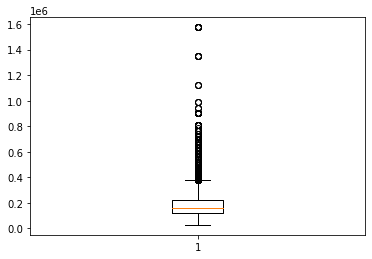

In [74]:
plt.boxplot(X_train['AMT_INCOME_TOTAL'])

In [81]:
q1, q3= np.percentile(X_train['AMT_INCOME_TOTAL'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
lower_bound, upper_bound

(-33750.0, 380250.0)

In [84]:
X_train.describe()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
count,29165.000000,29165.000000,29165.000000,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,0.329710,0.378433,0.670564,0.430790,1.868904e+05,2.397634,3.095285,1.371233,1.280610,1.0,0.224310,0.294977,0.090279,8.557929,2.197531,44.268370,6.462164
std,0.470116,0.485005,0.470016,0.741882,1.014096e+05,1.734540,1.342114,0.954270,0.946872,0.0,0.417134,0.456040,0.286587,4.536678,0.912189,11.515797,6.583796
min,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000,-0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,4.000000,2.000000,35.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.000000,4.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,8.000000,2.000000,43.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.000000,14.000000,3.000000,54.000000,9.000000
max,1.000000,1.000000,1.000000,19.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,1.0,1.000000,1.000000,1.000000,17.000000,20.000000,69.000000,44.000000


In [87]:
print(X_train['AMT_INCOME_TOTAL'].skew())

2.757115357132673


In [88]:
X_train["AMT_INCOME_TOTAL"] = np.where(X_train["AMT_INCOME_TOTAL"] <lower_bound, lower_bound,X_train['AMT_INCOME_TOTAL'])
X_train["AMT_INCOME_TOTAL"] = np.where(X_train["AMT_INCOME_TOTAL"] >upper_bound, upper_bound,X_train['AMT_INCOME_TOTAL'])
print(X_train['AMT_INCOME_TOTAL'].skew())

0.798692827188656


{'whiskers': [<matplotlib.lines.Line2D at 0x2b5224568e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b522456fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b522456580>],
 'medians': [<matplotlib.lines.Line2D at 0x2b52289e5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b52289ea90>],
 'means': []}

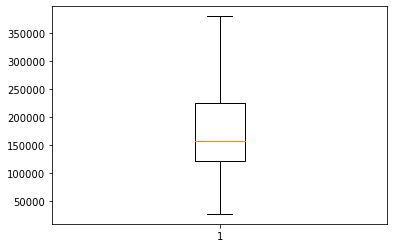

In [89]:
plt.boxplot(X_train['AMT_INCOME_TOTAL'])

In [90]:
modelForest = RandomForestClassifier(n_estimators=100, max_depth=12, bootstrap = True)
modelForest.fit(X_train, y_train)
predictions = modelForest.predict(X_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test,predictions)

print(f'Acc: {acc}')
print(f'f1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(classification_report(y_test, predictions))

Acc: 0.996434448710916
f1: 0.9982135495396455
Precision: 0.9967069154774972
Recall: 0.9997247453894853
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        26
           1       1.00      1.00      1.00      7266

    accuracy                           1.00      7292
   macro avg       0.75      0.54      0.57      7292
weighted avg       0.99      1.00      1.00      7292



In [94]:
y_train = y_train.astype('int')
X_balance_1,Y_balance_1 = SMOTE().fit_resample(X_train,y_train)
X_balance_1 = pd.DataFrame(X_balance_1, columns = X.columns)

In [137]:
modelForest.fit(X_balance_1, Y_balance_1)
predictions = modelForest.predict(X_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test,predictions)

print(f'Acc: {acc}')
print(f'f1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(classification_report(y_test, predictions))

predictions = modelForest.predict(X_balance_t)
acc = accuracy_score(Y_balance_t, predictions)
f1 = f1_score(Y_balance_t, predictions)
precision = precision_score(Y_balance_t, predictions)
recall = recall_score(Y_balance_t,predictions)
print("After balancing the classes:")
print(f'Acc: {acc}')
print(f'f1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(classification_report(Y_balance_t, predictions))

Acc: 0.9591332967635765
f1: 0.9791170287316048
Precision: 0.997430039977156
Recall: 0.9614643545279383
              precision    recall  f1-score   support

           0       0.03      0.31      0.05        26
           1       1.00      0.96      0.98      7266

    accuracy                           0.96      7292
   macro avg       0.51      0.63      0.52      7292
weighted avg       0.99      0.96      0.98      7292

After balancing the classes:
Acc: 0.822598403523259
f1: 0.8442296072507554
Precision: 0.7524773804394658
Recall: 0.9614643545279383
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      7266
           1       0.75      0.96      0.84      7266

    accuracy                           0.82     14532
   macro avg       0.85      0.82      0.82     14532
weighted avg       0.85      0.82      0.82     14532



In [138]:
with open('Credit_Approval_RF_model_Smote.pkl', 'wb') as f:
    pickle.dump(modelForest, f)

In [119]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 21)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 60, num = 16)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, None], 'min_samples_split': [1, 2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]}


In [120]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_balance_1, Y_balance_1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 4, 8, 12, 16, 20, 24,
                                                      28, 32, 36, 40, 44, 48,
                                                      52, 56, 60, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [1, 10, 20, 30, 40, 50,
                                                         60, 70, 80, 90, 100,
                                                         110, 120, 130, 140,
                                                         150, 160, 170, 180,
                                                         190, 20

In [121]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [122]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=150)

In [139]:
rf_random = RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=150)
rf_random.fit(X_balance_1, Y_balance_1)
predictions = rf_random.predict(X_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test,predictions)

print(f'Acc: {acc}')
print(f'f1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(classification_report(y_test, predictions))

predictions = rf_random.predict(X_balance_t)
acc = accuracy_score(Y_balance_t, predictions)
f1 = f1_score(Y_balance_t, predictions)
precision = precision_score(Y_balance_t, predictions)
recall = recall_score(Y_balance_t,predictions)
print("After balancing the classes:")
print(f'Acc: {acc}')
print(f'f1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(classification_report(Y_balance_t, predictions))

Acc: 0.9943773998902907
f1: 0.9971780576777478
Precision: 0.9973840011014732
Recall: 0.996972199284338
              precision    recall  f1-score   support

           0       0.24      0.27      0.25        26
           1       1.00      1.00      1.00      7266

    accuracy                           0.99      7292
   macro avg       0.62      0.63      0.63      7292
weighted avg       0.99      0.99      0.99      7292

After balancing the classes:
Acc: 0.7859895403248004
f1: 0.8232753722013865
Precision: 0.7011227255129694
Recall: 0.996972199284338
              precision    recall  f1-score   support

           0       0.99      0.58      0.73      7266
           1       0.70      1.00      0.82      7266

    accuracy                           0.79     14532
   macro avg       0.85      0.79      0.78     14532
weighted avg       0.85      0.79      0.78     14532

